In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Previsão com séries temporais (ARIMA)


In [2]:
# Importação das bibliotecas 
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv('AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

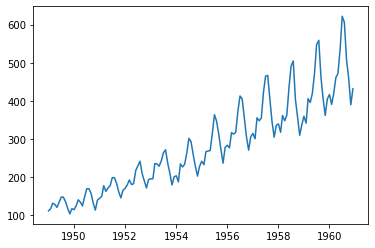

In [4]:
# Visualização da série temporal completa
plt.plot(ts)

In [14]:
# Criação do modelo ARIMA com os parâmetro p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
modelo = ARIMA(ts, order=(3, 1, 3),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

C:\Users\Vinicius\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Vinicius\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -660.388
Method:                       css-mle   S.D. of innovations             23.753
Date:                Sun, 02 May 2021   AIC                           1336.776
Time:                        18:05:10   BIC                           1360.478
Sample:                    02-01-1949   HQIC                          1346.407
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5780      0.775      3.325      0.001       1.058       4.098
ar.L1.D.#Passengers     0.9661      0.100      9.614      0.000       0.769       1.163
ar.L2.D.#Passengers     0.1890      0.165      1.147      0.251      -0.134       0.512
ar.L3.D.#Passengers    -0.5878      0.100     -5.884      0.000      -0.784      -0.392
ma.L1.D.#Passengers    -1.0103      0.075    -13.479      0.000      -1.157      -0.863
ma.L2.D.#Passengers    -0.7206      0.112     -6.408      0.000      -0.941      -0.500
ma.L3.D.#Passengers     0.9002      0.073     12.321      0.000       0.757       1.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9163           -0.5349j            1.0611           -0.0841
AR.2            0.9163           +0.5349j            1.0611            0.0841
AR.3           -1.5112           -0.0000j            1.5112           -0.5000
MA.1           -1.1106           -0.0000j            1.1106           -0.5000
MA.2            0.9555           -0.2953j            1.0001           -0.0477
MA.3            0.9555           +0.2953j            1.0001            0.0477
-----------------------------------------------------------------------------
"""

In [6]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.1286319 , 450.90777259, 479.83873706, 512.00287505,
       539.35297116, 555.83067099, 558.77161308, 549.29511381,
       531.66843986, 511.90493341, 496.03224779, 488.51374805])

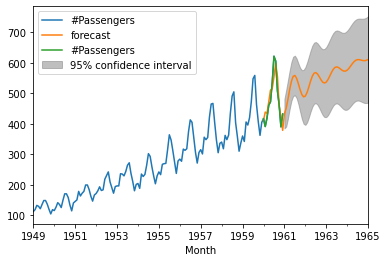

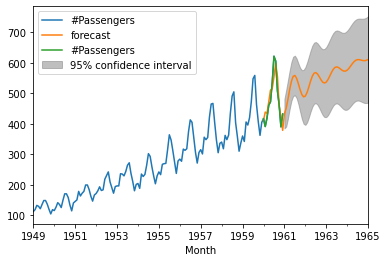

In [8]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1965-01-01',
                             ax = eixo, plot_insample = True)

In [13]:
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
#ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 02 May 2021   AIC                           1017.847
Time:                                     18:04:33   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.344      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3080     14.555      8.884      0.000     100.780     157.836
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
proximos_12 = modelo_auto.predict(n_periods = 12)
# Visualização dos próximos 12 valores
proximos_12 

array([445.63492135, 420.3949863 , 449.19830748, 491.83993396,
       503.39446547, 566.86244169, 654.26017031, 638.5974858 ,
       540.88374373, 494.12662715, 423.3327197 , 465.5075914 ])